In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_weekly_returns(file_path):
    # Load the data
    df = pd.read_csv(file_path)

    # Convert the 'Date' column to a datetime object
    df['Date'] = pd.to_datetime(df['Date'])

    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)

    # Create a 'Week' column which indicates the calendar week
    df['Week'] = df.index.to_period('W')

    # Group by 'Week' and select the last observation of each week
    weekly_prices = df.groupby('Week').last()['Adj Close']

    # Calculate the weekly returns
    weekly_returns = weekly_prices.pct_change()

    # The first value will be NaN (as there's no previous week to compare to), so we'll remove that
    weekly_returns = weekly_returns.dropna()

    # Convert the series to dataframe for better visualization
    weekly_returns_df = weekly_returns.to_frame()

    # Rename the column for clarity
    weekly_returns_df.columns = ['Weekly Returns']

    return weekly_returns_df

# Test the function
weekly_returns_df = calculate_weekly_returns('data/TSLA.csv')

# Convert Period index to datetime index
weekly_returns_df.index = weekly_returns_df.index.to_timestamp()
weekly_returns_df.head()

,Weekly Returns
Week,
2010-07-05,-0.093750
2010-07-12,0.186207
2010-07-19,0.031492
2010-07-26,-0.063410
2010-08-02,-0.017552


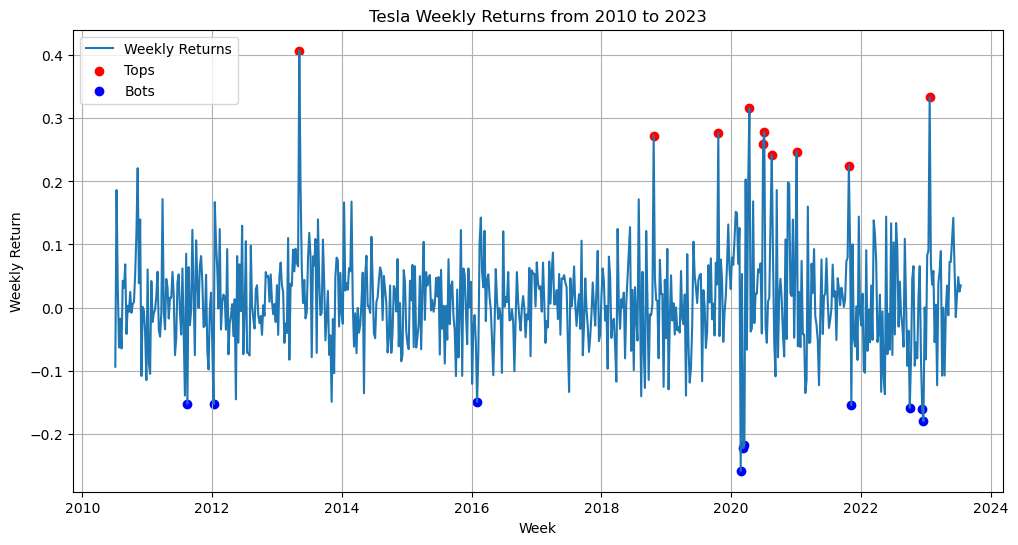

In [9]:
# Calculate Max return. 
# Identify the top 5 highest and lowest returns
tops = weekly_returns_df['Weekly Returns'].nlargest(10)
bots = weekly_returns_df['Weekly Returns'].nsmallest(10)

# Create the plot
plt.figure(figsize=(12,6))
plt.plot(weekly_returns_df.index, weekly_returns_df['Weekly Returns'], label='Weekly Returns')
plt.scatter(tops.index, tops.values, color='red', label='Tops')  # top 5 return points
plt.scatter(bots.index, bots.values, color='blue', label='Bots')  # bottom 5 return points
plt.title('Tesla Weekly Returns from 2010 to 2023')
plt.xlabel('Week')
plt.ylabel('Weekly Return')
plt.grid(True)
plt.legend()
plt.show()


In [4]:
# Shall we roll the options? 







Week
2013-05-06    0.407149
2023-01-23    0.333383
2020-04-13    0.315689
2020-07-06    0.277986
2019-10-21    0.277019
2018-10-22    0.272692
2020-06-29    0.259362
2021-01-04    0.247070
2020-08-17    0.241878
2021-10-25    0.224607
Name: Weekly Returns, dtype: float64